In [49]:
# Importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import warnings
warnings.filterwarnings('ignore')

Loading the dataset into a pandas DataFrame, and getting a visual overview!!

In [51]:
df = pd.read_csv('/content/rwsi_data.csv')
df.head()

,ggSessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


In [52]:
df.shape

(12330, 20)

> We have 12000+ records, of different sessions. And a total of 19 parameters/point of interaction that is being noted.. with one output variable `MonetaryConversion`

## **Feature Definitions**


1. `SessionID`: Unique alphanumeric identifier for each session (generated ID).

2. `AdClicks`: Number of ad banners clicked during the session (0–4). Acts as a soft proxy for ad engagement.

3. `InfoSectionCount`: Number of times a user accessed informational or support sections (e.g., FAQs, company info) during the session.

4. `InfoSectionTime`: Total time (in seconds) spent in informational/help sections. Indicates how much the user relied on non-product content before making decisions.

5. `HelpPageVisits`: Count of dedicated help or guidance pages visited (e.g., “how to use”, “warranty info”).

6. `HelpPageTime`: Cumulative time spent on help pages. Longer durations might suggest confusion or detailed exploration.

7. `ItemBrowseCount`: Number of product pages viewed in the session. A strong proxy for product discovery activity.

8. `ItemBrowseTime`: Total time spent on product-related pages. Correlates with browsing depth or comparison behavior.

9. `ExitRateFirstPage`: Ratio of sessions that ended after the first page view. Measures immediate disengagement or bounce likelihood.

10. `SessionExitRatio`: Overall exit probability based on the number of pages viewed vs. total exits.

11. `PageEngagementScore`: Derived score indicating how valuable or interactive the pages were. (Weighted sum of dwell times and interactions.)

12. `HolidayProximityIndex`: Index (0–1) representing how close the session date is to major holidays or campaigns. Higher values mean closer to key retail periods.

13. `VisitMonth`: Encoded month of visit (1–12). Useful for detecting seasonality or monthly behavior trends.

14. `UserPlatformID`: Encoded identifier for the user’s operating platform (Windows, Mac, iOS, Android, etc.).

15. `WebClientCode`: Encoded browser identifier (e.g., Chrome, Edge, Safari).

16. `MarketZone`: Encoded global region or market area (e.g., North America, Europe, Asia-Pacific, etc.).

17. `TrafficSourceCode`: Encoded numeric tag for inbound traffic type (e.g., Organic, Paid Ads, Referral, Direct).

18. `UserCategory`: Encoded user classification (e.g., New, Returning, or Loyal)Reflects behavioral grouping rather than identity.

19. `IsWeekendVisit`: Boolean indicator (0/1) showing if the session occurred on a weekend.

20. `MonetaryConversion` (Target Variable): Binary target variable.

    1 = session resulted in a transaction/conversion,

    0 = no conversion.


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ggSessionID            12330 non-null  object 
 1   AdClicks               11467 non-null  float64
 2   InfoSectionCount       11961 non-null  float64
 3   InfoSectionTime        11961 non-null  float64
 4   HelpPageVisits         12084 non-null  float64
 5   HelpPageTime           12084 non-null  float64
 6   ItemBrowseCount        11837 non-null  float64
 7   ItemBrowseTime         11837 non-null  float64
 8   ExitRateFirstPage      12207 non-null  float64
 9   SessionExitRatio       12084 non-null  float64
 10  PageEngagementScore    11961 non-null  float64
 11  HolidayProximityIndex  11837 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         11837 non-null  object 
 14  WebClientCode          11714 non-null  object 
 15  Ma

**Observations:**
1. Several null values to be treated.
2. Columns like SessionID is not useful for training; can be dropped.
3. Features such as `VisitMonth`, `UserPlatformID`, `MarketZone`, and `UserCategory` will require encoding.

Checking the count of null values in each columns!

In [54]:
df.isnull().sum()

,0
ggSessionID,0
AdClicks,863
InfoSectionCount,369
InfoSectionTime,369
HelpPageVisits,246
HelpPageTime,246
ItemBrowseCount,493
ItemBrowseTime,493
ExitRateFirstPage,123
SessionExitRatio,246


Text(181.94444444444446, 0.5, 'Sessions')

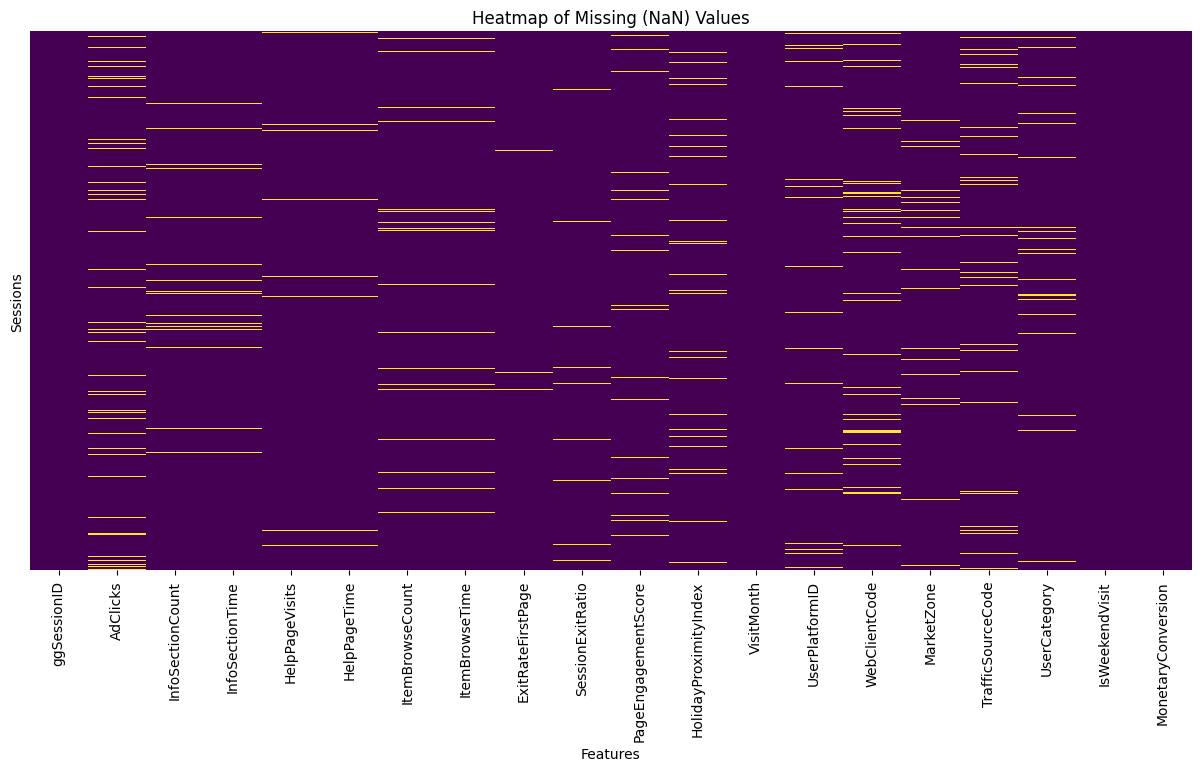

In [55]:
# Visualizing the missing values

plt.figure(figsize=(15, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing (NaN) Values')
plt.xlabel('Features')
plt.ylabel('Sessions')



Counts:
MonetaryConversion
No     10422
Yes     1908
Name: count, dtype: int64

Percentages:
MonetaryConversion
No     84.525547
Yes    15.474453
Name: proportion, dtype: float64


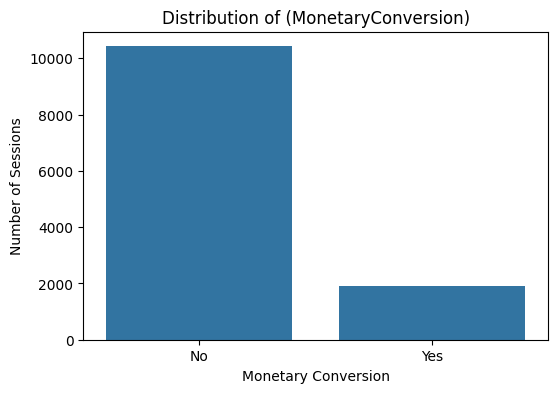

In [56]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='MonetaryConversion', data=df)
plt.title('Distribution of (MonetaryConversion)')
plt.xlabel('Monetary Conversion')
plt.ylabel('Number of Sessions')

# count and percentage
conversion_counts = df['MonetaryConversion'].value_counts()
conversion_perc = df['MonetaryConversion'].value_counts(normalize=True) * 100
print(f"\nCounts:\n{conversion_counts}")
print(f"\nPercentages:\n{conversion_perc}")


Checking the correlation between the numerical features.

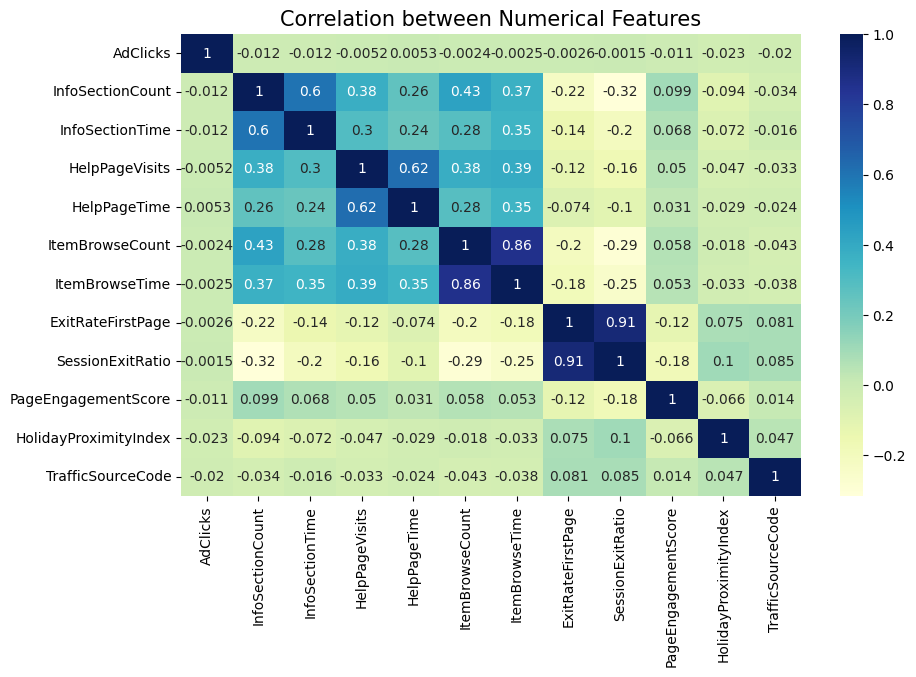

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot= True, cmap='YlGnBu')
plt.title('Correlation between Numerical Features', fontsize=15)
plt.show()

### **Univariate Analysis**

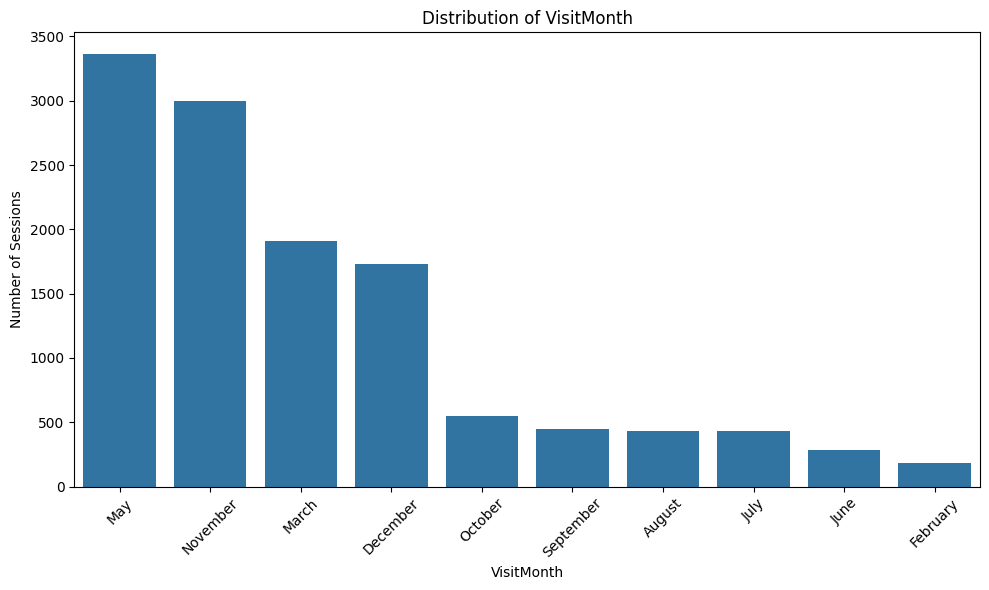

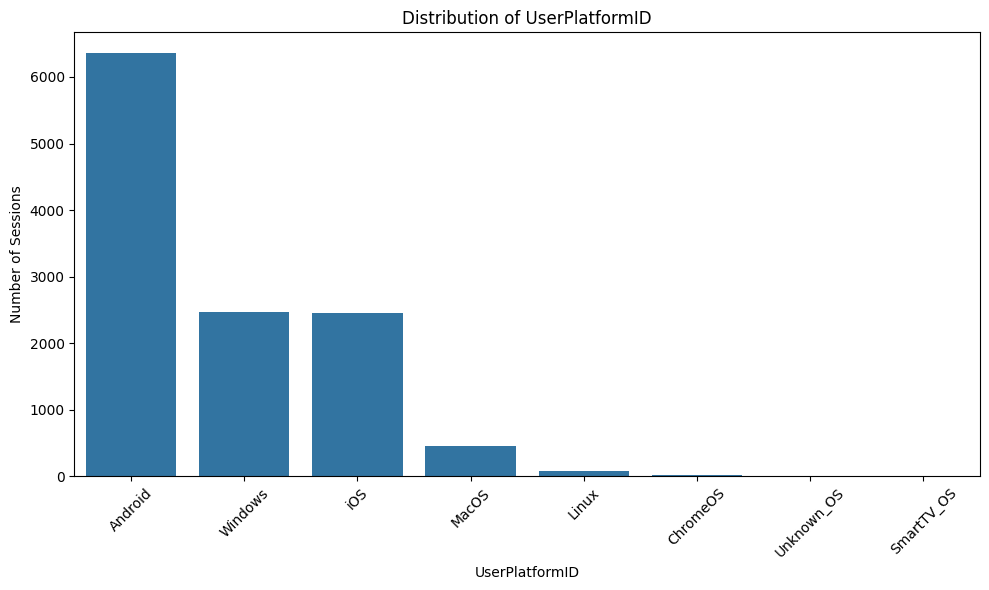

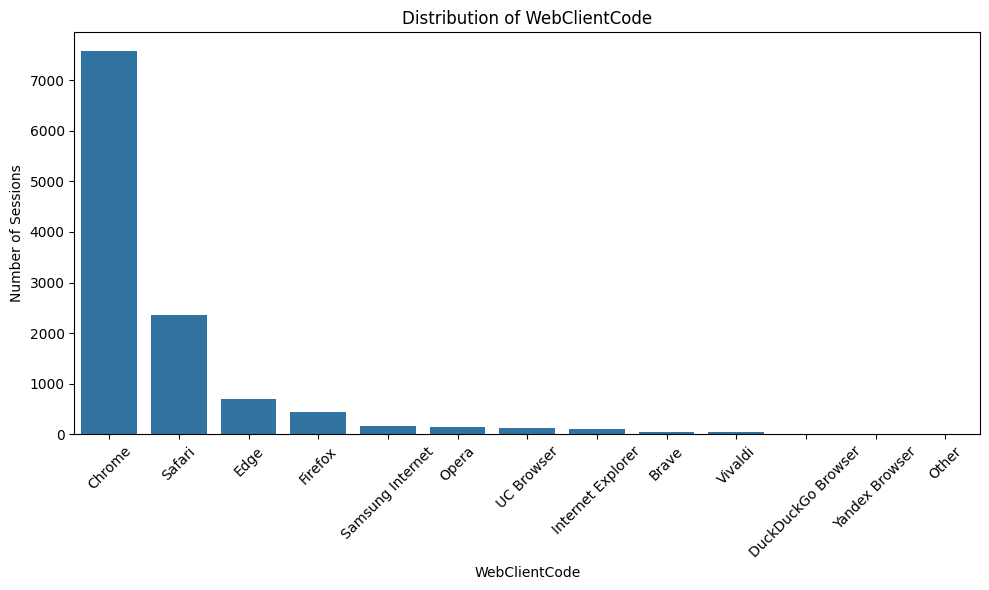

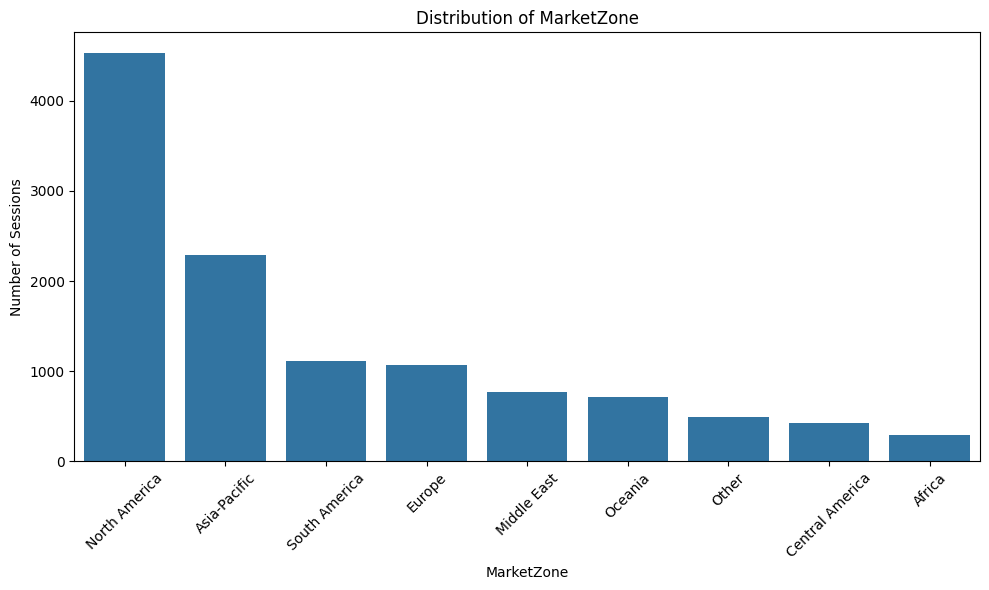

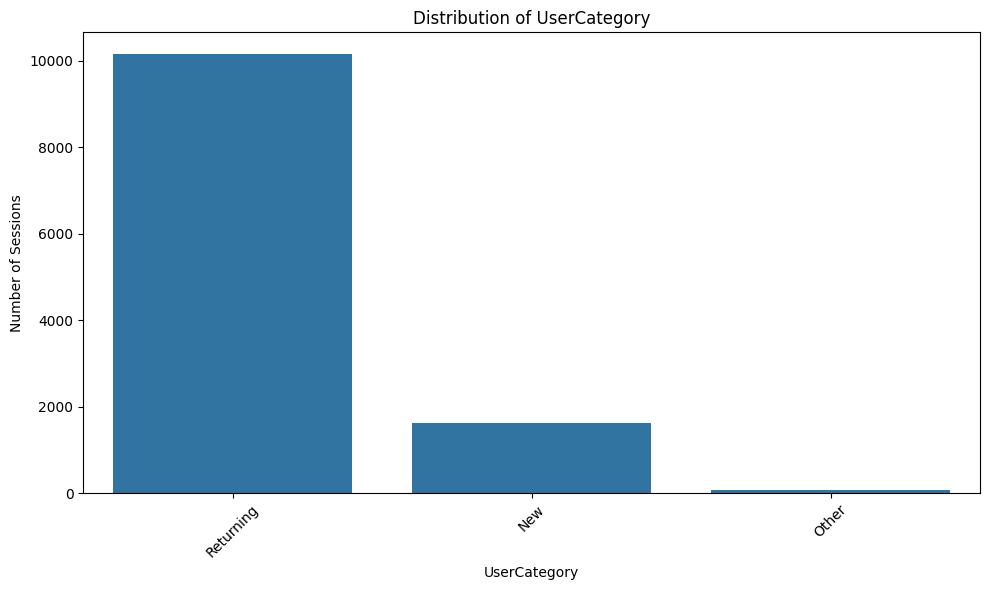

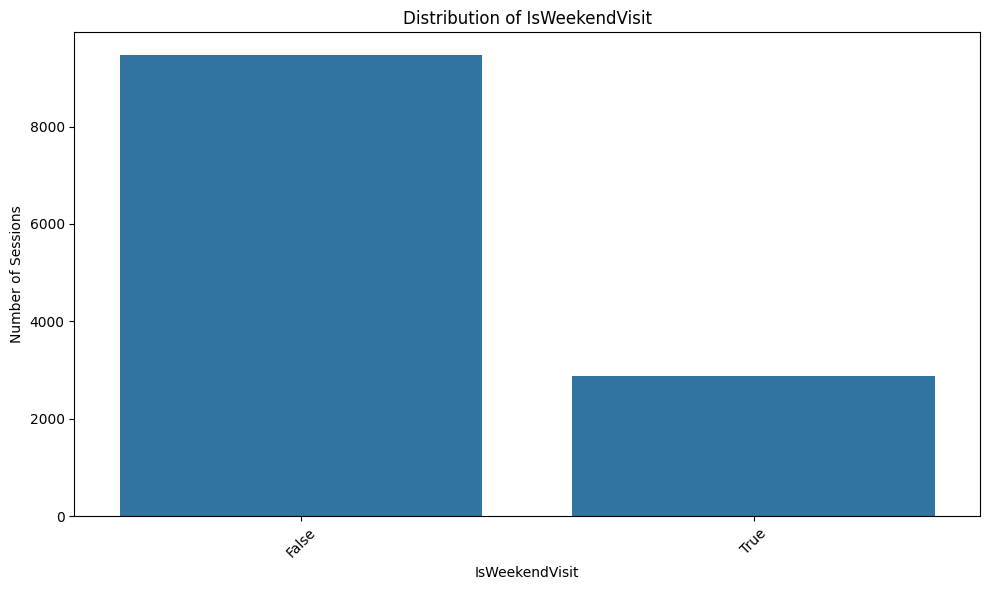

In [58]:
# for the categorical features

categorical_cols = [
    'VisitMonth', 'UserPlatformID', 'WebClientCode',
    'MarketZone', 'UserCategory', 'IsWeekendVisit'
]

# looping and building countplot for each
for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Sessions')
    plt.xticks(rotation=45)
    plt.tight_layout()

In [59]:
months = ['February', 'March', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for month in months:
  month_df = df[df['VisitMonth'] == month]
  conversion = month_df['MonetaryConversion'].value_counts()
  percentage_conversion = conversion / len(month_df) * 100
  # print(f'The total number of sessions in {month} was {len(month_df)}')
  # print(f'The percentage monetary conversion in the month of {month} was {round(percentage_conversion[1], 2)}%')
  print(f'{month}: Sessions - {len(month_df)}, Monetary Conversions - {round(percentage_conversion[1], 2)}%')
  print()

February: Sessions - 184, Monetary Conversions - 1.63%

March: Sessions - 1907, Monetary Conversions - 10.07%

May: Sessions - 3364, Monetary Conversions - 10.85%

June: Sessions - 288, Monetary Conversions - 10.07%

July: Sessions - 432, Monetary Conversions - 15.28%

August: Sessions - 433, Monetary Conversions - 17.55%

September: Sessions - 448, Monetary Conversions - 19.2%

October: Sessions - 549, Monetary Conversions - 20.95%

November: Sessions - 2998, Monetary Conversions - 25.35%

December: Sessions - 1727, Monetary Conversions - 12.51%



### **Bivariate Analysis of the same categorical features with the target feature**

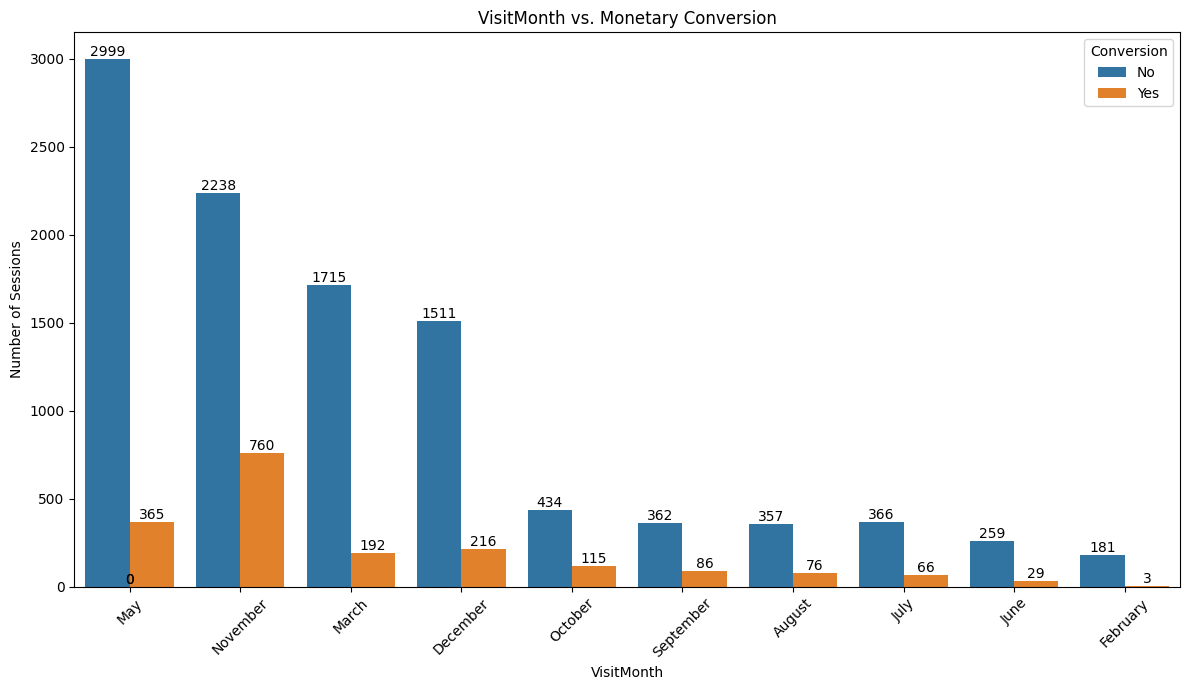

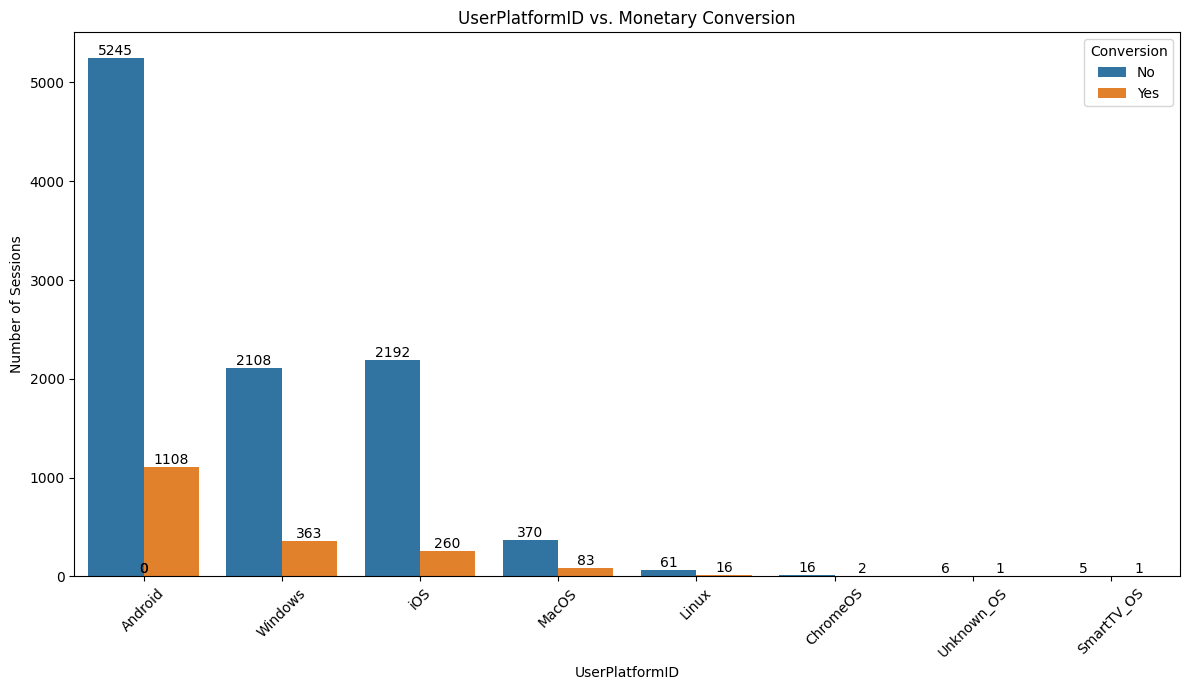

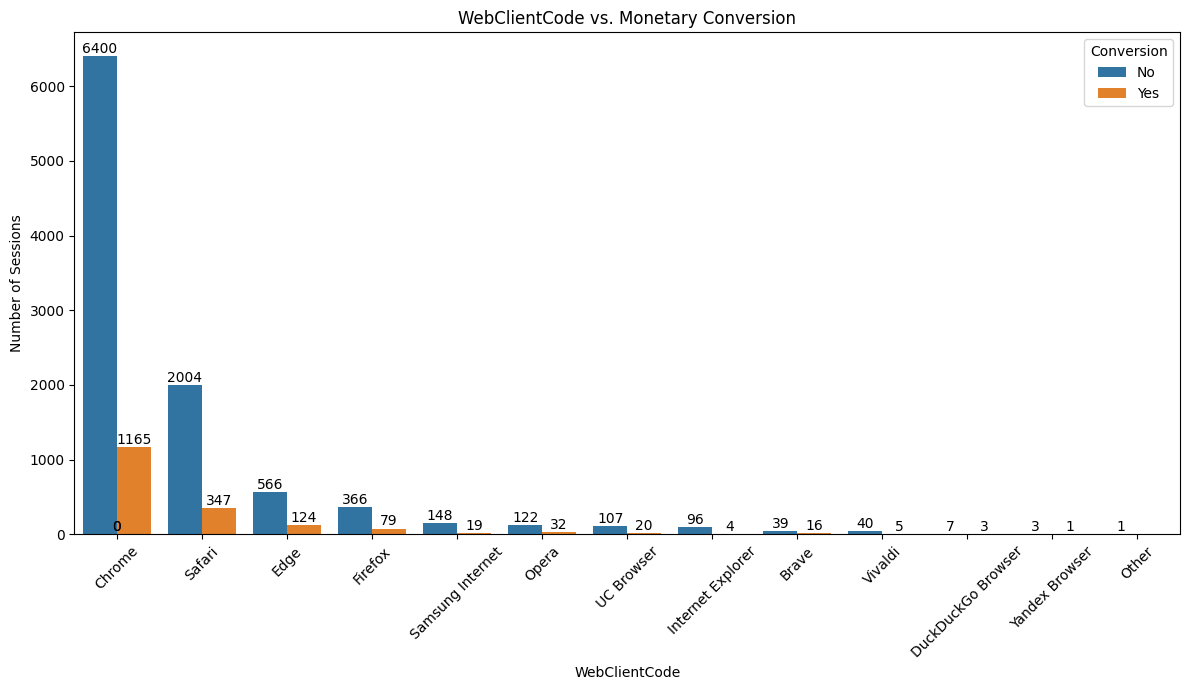

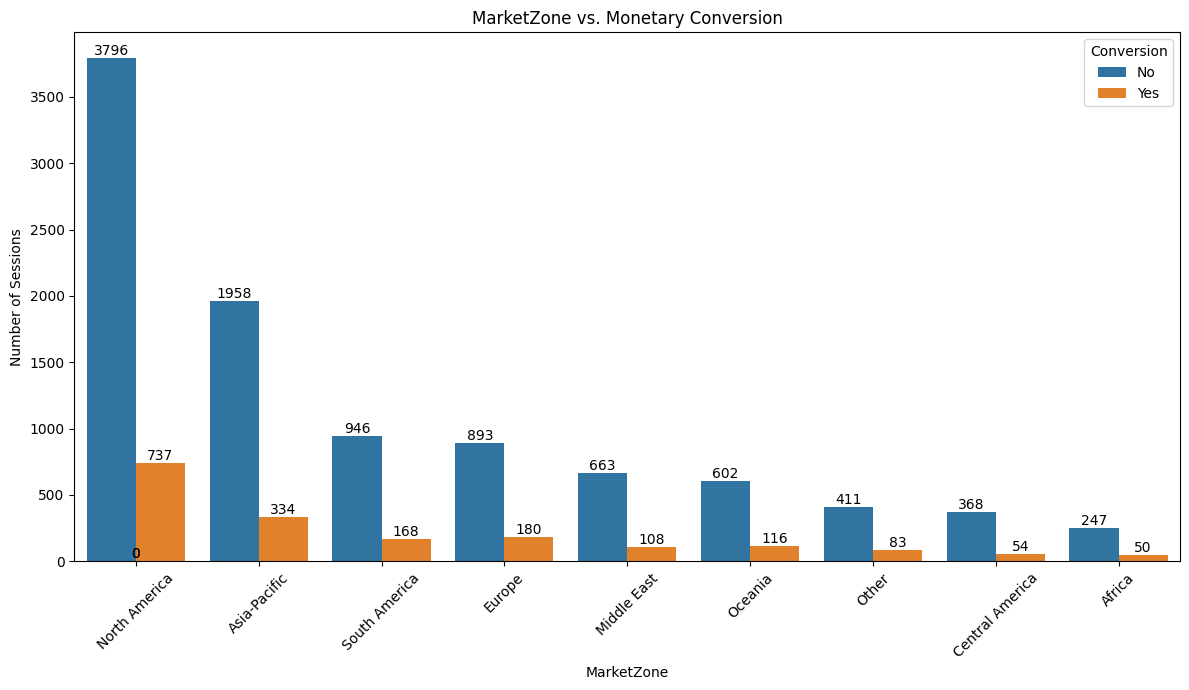

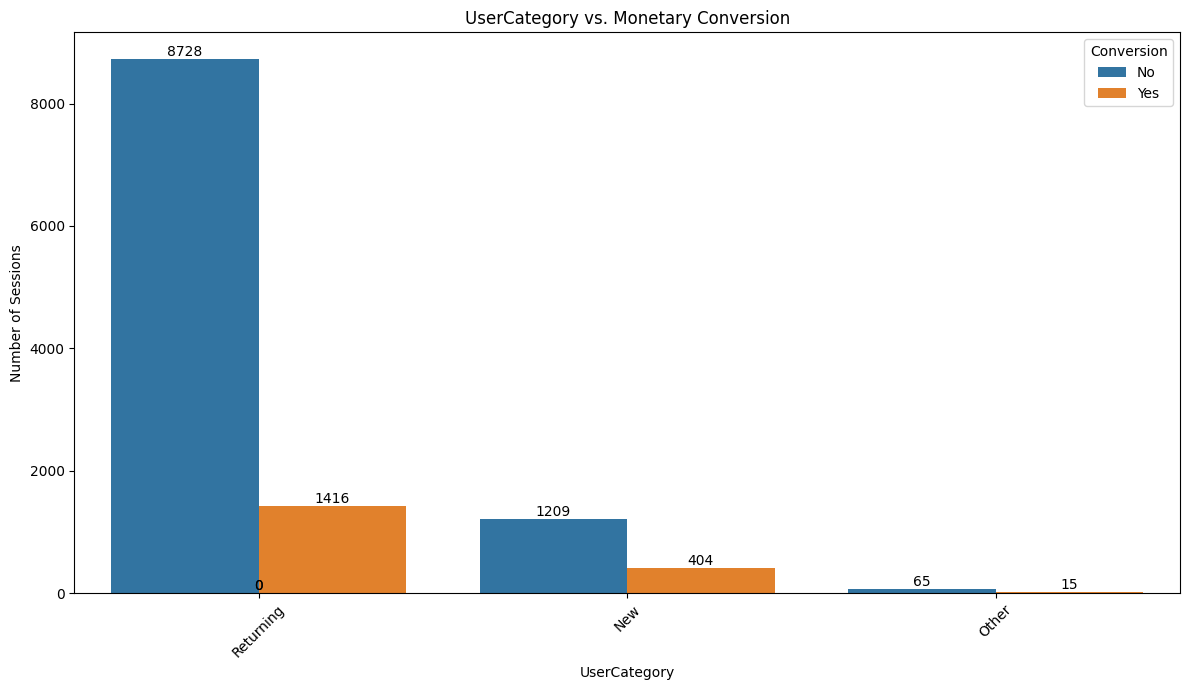

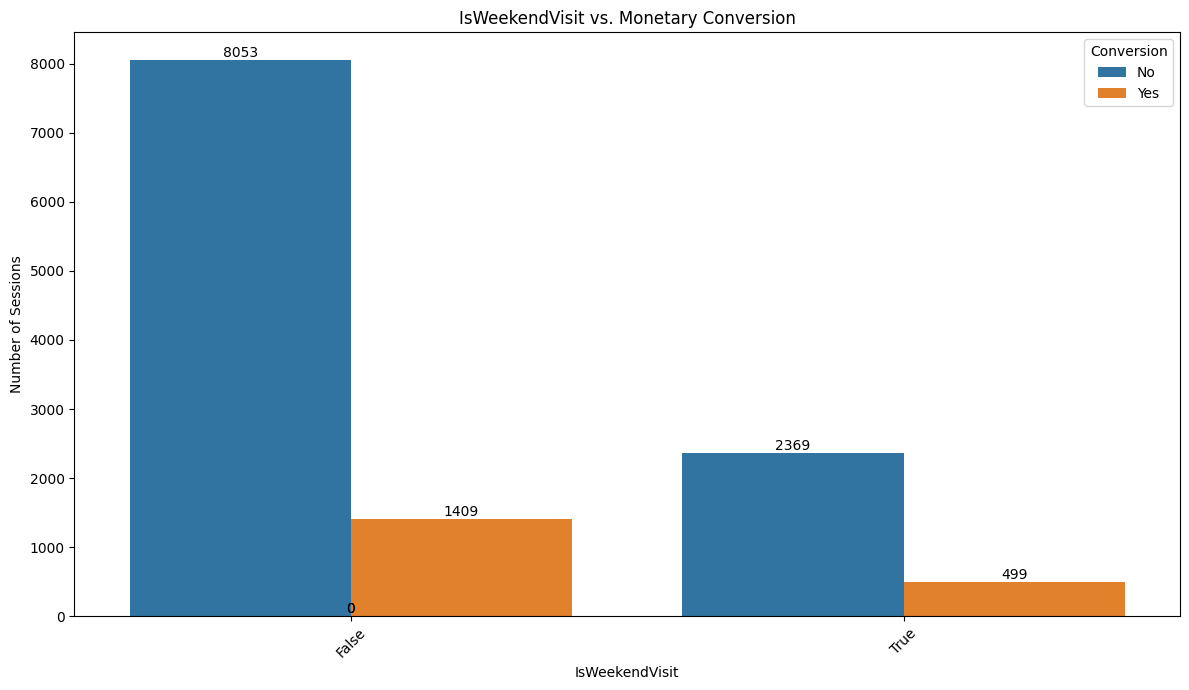

In [60]:

for col in categorical_cols:
    plt.figure(figsize=(12, 7))
    ax = sns.countplot(x=col, hue='MonetaryConversion', data=df,
                  order=df[col].value_counts().index)

    # Add total counts on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.1,  # Adjust vertical position of the label
                '{}'.format(int(height)),
                ha='center', va='bottom')

    plt.title(f'{col} vs. Monetary Conversion')
    plt.xlabel(col)
    plt.ylabel('Number of Sessions')
    plt.xticks(rotation=45)
    plt.legend(title='Conversion')
    plt.tight_layout()
    plt.show()

### **Visualizing outliers on non-category columns**




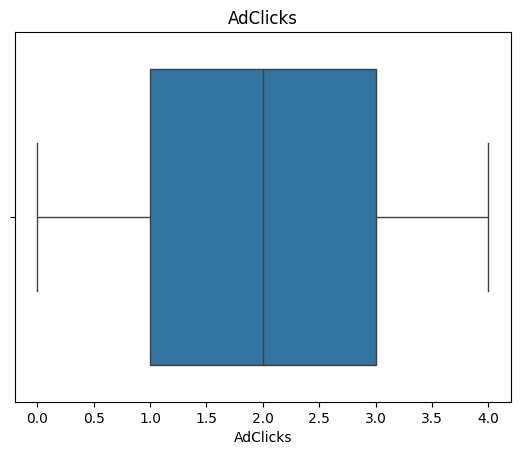

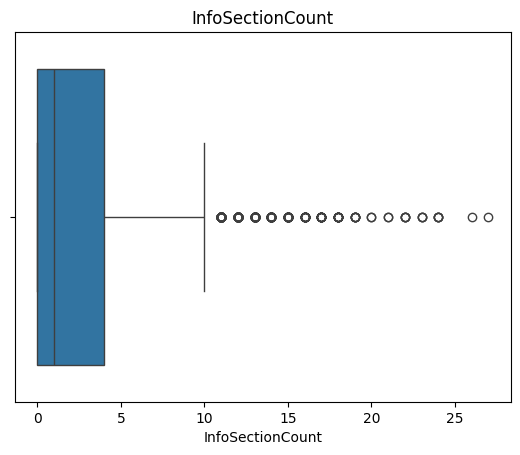

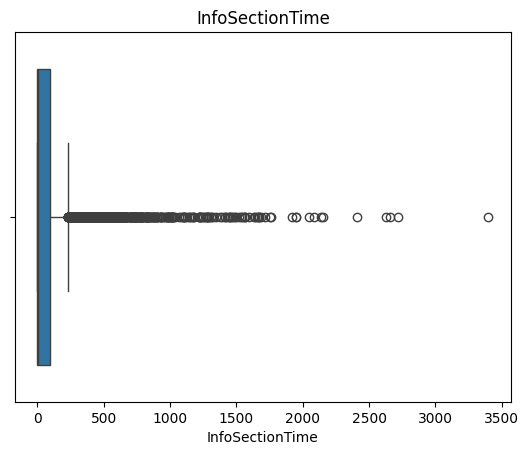

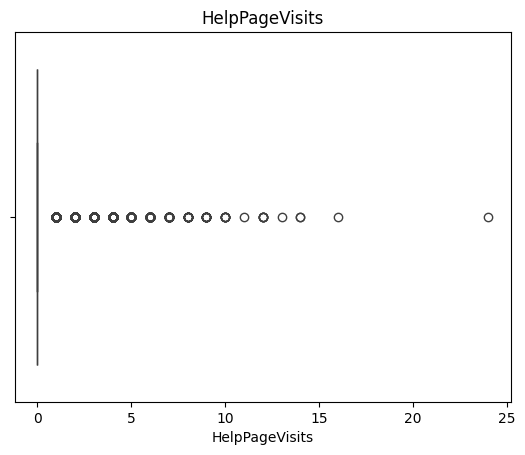

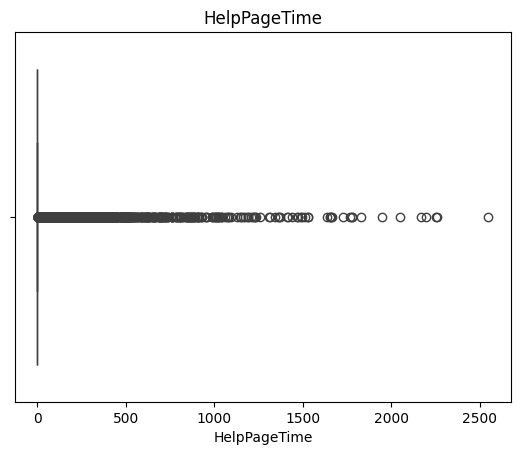

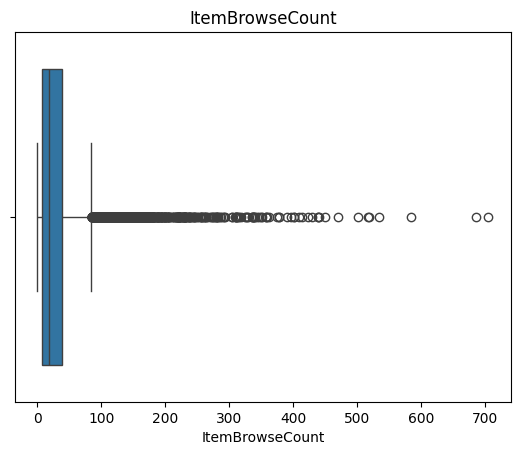

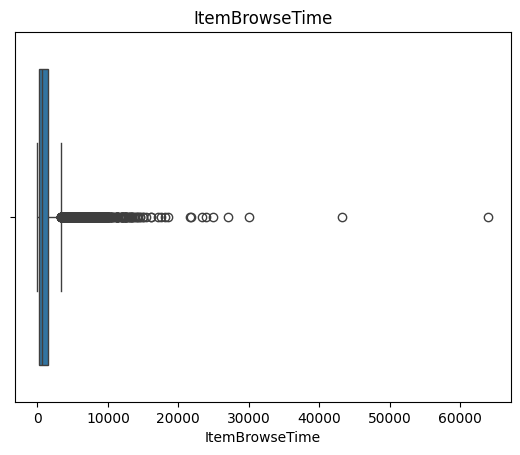

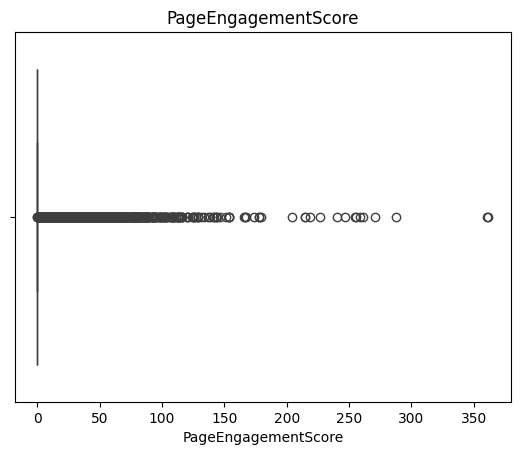

In [61]:
non_category_cols = ['AdClicks', 'InfoSectionCount', 'InfoSectionTime', 'HelpPageVisits', 'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime', 'PageEngagementScore']

for col in non_category_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

### **Checking value counts on categorical columns**

In [62]:
columns = ['MonetaryConversion', 'IsWeekendVisit', 'UserCategory', 'MarketZone', 'WebClientCode', 'UserPlatformID', 'VisitMonth', 'HolidayProximityIndex', 'AdClicks']

for col in columns:
  print(f"<<< Value Counts of {col} >>>")
  print(df[col].value_counts())
  print()


<<< Value Counts of MonetaryConversion >>>
MonetaryConversion
No     10422
Yes     1908
Name: count, dtype: int64

<<< Value Counts of IsWeekendVisit >>>
IsWeekendVisit
False    9462
True     2868
Name: count, dtype: int64

<<< Value Counts of UserCategory >>>
UserCategory
Returning    10144
New           1613
Other           80
Name: count, dtype: int64

<<< Value Counts of MarketZone >>>
MarketZone
North America      4533
Asia-Pacific       2292
South America      1114
Europe             1073
Middle East         771
Oceania             718
Other               494
Central America     422
Africa              297
Name: count, dtype: int64

<<< Value Counts of WebClientCode >>>
WebClientCode
Chrome                7565
Safari                2351
Edge                   690
Firefox                445
Samsung Internet       167
Opera                  154
UC Browser             127
Internet Explorer      100
Brave                   55
Vivaldi                 45
DuckDuckGo Browser      10
Yand

### **Train Test Split before preprocessing to avoid data leakage**

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ggSessionID', 'MonetaryConversion'])
y = df['MonetaryConversion']

# mapping the target variable
y = y.map({'No': 0, 'Yes': 1})

# 'stratify' ensures the 15.47% imbalance is identical in both train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

print("\nDistribution of o/p in 'y_train':")
print(y_train.value_counts(normalize=True))      # normalize used to get the proportions
print("\nDistribution of target variable in 'y_test':")
print(y_test.value_counts(normalize=True))

X_train shape: (9864, 18)
X_test shape:  (2466, 18)

Distribution of o/p in 'y_train':
MonetaryConversion
0    0.845296
1    0.154704
Name: proportion, dtype: float64

Distribution of target variable in 'y_test':
MonetaryConversion
0    0.845093
1    0.154907
Name: proportion, dtype: float64


### **Imputation**

The columns in `action_cols` have null values that means users didn't visited Info Sections, or the Help Pages. Therefore imputation using somthing like median would keep them at par with those actually browsing these particular sections!! **So it's better to impute `0` there to correctly represent such sessions separately.**

In [64]:
from sklearn.impute import SimpleImputer

# defining different column groups
# to apply different imputations accordingly
no_visit_cols = [
    'AdClicks', 'InfoSectionCount', 'InfoSectionTime',
    'HelpPageVisits', 'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime'
]

num_cols = [
    'ExitRateFirstPage', 'SessionExitRatio',
    'PageEngagementScore', 'HolidayProximityIndex'
]

categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols.append('TrafficSourceCode')
# adding this column as it seems to be numerical but is not! (categorical behaviour)


# Impute no_visit Columns with 0 (strategy=0)
imputer_no_visit = SimpleImputer(strategy='constant', fill_value=0)
X_train[no_visit_cols] = imputer_no_visit.fit_transform(X_train[no_visit_cols])
X_test[no_visit_cols] = imputer_no_visit.transform(X_test[no_visit_cols])

# Impute Numerical Clmns with median (strategy=median)
imputer_num = SimpleImputer(strategy='median')
X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer_num.transform(X_test[num_cols])

# Impute Categorical Columns with mode (strategy=mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = imputer_cat.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = imputer_cat.transform(X_test[categorical_cols])


print("\n Did Imputation happen?")
print(f"Missing values in X_train: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test: {X_test.isnull().sum().sum()}")

X_train.info()


 Did Imputation happen?
Missing values in X_train: 0
Missing values in X_test: 0
<class 'pandas.core.frame.DataFrame'>
Index: 9864 entries, 4263 to 11430
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AdClicks               9864 non-null   float64
 1   InfoSectionCount       9864 non-null   float64
 2   InfoSectionTime        9864 non-null   float64
 3   HelpPageVisits         9864 non-null   float64
 4   HelpPageTime           9864 non-null   float64
 5   ItemBrowseCount        9864 non-null   float64
 6   ItemBrowseTime         9864 non-null   float64
 7   ExitRateFirstPage      9864 non-null   float64
 8   SessionExitRatio       9864 non-null   float64
 9   PageEngagementScore    9864 non-null   float64
 10  HolidayProximityIndex  9864 non-null   float64
 11  VisitMonth             9864 non-null   object 
 12  UserPlatformID         9864 non-null   object 
 13  WebClientCode          9864

In [65]:
X_train.head()

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit
4263,2.0,8.0,732.25,0.0,0.0,34.0,1345.755952,0.005128,0.013342,12.274195,0.8,May,iOS,Internet Explorer,Asia-Pacific,2.0,Returning,False
5905,2.0,0.0,0.00,0.0,0.0,4.0,157.200000,0.040000,0.100000,0.000000,0.0,October,Windows,UC Browser,Asia-Pacific,1.0,Returning,True
9434,0.0,0.0,0.00,0.0,0.0,4.0,42.000000,0.000000,0.050000,0.000000,0.0,December,Android,Chrome,North America,2.0,Returning,False
3505,3.0,2.0,338.00,0.0,0.0,17.0,1205.566667,0.012500,0.037500,19.236250,0.8,May,iOS,Chrome,Europe,2.0,Returning,False
2067,2.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000587,54.676348,0.0,March,Android,Chrome,Oceania,2.0,Returning,False


In [66]:
y_train.head()

,MonetaryConversion
4263,0
5905,0
9434,0
3505,1
2067,1


#### The UserPlatformID column (e.g., 'Android', 'Windows', 'iOS', 'Linux') has many categories. Grouping them into 'Mobile', 'Computer', and 'Other' to make the feature simpler and more powerful for the model.

In [67]:
def categorize_device(platformID):
    mobileOS = ['Android', 'iOS']
    computerOS = ['Windows', 'MacOS', 'Linux', 'ChromeOS']

    if platformID in mobileOS:
        return 'Mobile'
    elif platformID in computerOS:
        return 'Computer'
    else:
        # This will catch 'SmartTV_OS', 'Unknown_OS', etc.
        return 'Other'

# applying the function to both train and test sets
X_train['DeviceCategory'] = X_train['UserPlatformID'].apply(categorize_device)
X_test['DeviceCategory'] = X_test['UserPlatformID'].apply(categorize_device)

# dropping the original column
X_train = X_train.drop('UserPlatformID', axis=1)
X_test = X_test.drop('UserPlatformID', axis=1)

### **Encoding**

In [68]:
from sklearn.preprocessing import OneHotEncoder

# True/False to 1/0
X_train['IsWeekendVisit'] = X_train['IsWeekendVisit'].apply(lambda x: 1 if x == True or x == 'True' else 0)
X_test['IsWeekendVisit'] = X_test['IsWeekendVisit'].apply(lambda x: 1 if x == True or x == 'True' else 0)



# Cyclic Encoding for the month column
'''
Something new(for me) but highly useful as it retains the order and periodicity
of the months, i.e. the model will know December and January are adjacent.
It produces a set of sine and cos angles for each month.
Moreover, something like OHE would have created 12 columns, not feasible.
'''
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11,
    'December': 12
}
X_train['Month_num'] = X_train['VisitMonth'].map(month_map)
X_test['Month_num'] = X_test['VisitMonth'].map(month_map)

## cyclic encoding
for i in [X_train, X_test]:
    i['Month_sin'] = np.sin(2 * np.pi * i['Month_num'] / 12)
    i['Month_cos'] = np.cos(2 * np.pi * i['Month_num'] / 12)

# not of much use anymore
X_train = X_train.drop(['VisitMonth', 'Month_num'], axis=1)
X_test = X_test.drop(['VisitMonth', 'Month_num'], axis=1)



# One-Hot Encoding for multi-category features
ohe_cols = ['WebClientCode', 'MarketZone', 'UserCategory', 'DeviceCategory', 'TrafficSourceCode']
# traffic source code looks numeric but behave as categoric

# # Convert columns to string to ensure they are treated as categories
X_train[ohe_cols] = X_train[ohe_cols].astype(str)
X_test[ohe_cols] = X_test[ohe_cols].astype(str)

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
ohe.fit(X_train[ohe_cols]) # fit ONLY on training data

# Get new feature names
ohe_feature_names = ohe.get_feature_names_out(ohe_cols)

# transformation on BOTH train and test data
X_train_ohe = ohe.transform(X_train[ohe_cols])
X_test_ohe = ohe.transform(X_test[ohe_cols])

# converting back to DataFrames
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe_feature_names, index=X_test.index)

# removing the original columns
X_train = X_train.drop(ohe_cols, axis=1)
X_test = X_test.drop(ohe_cols, axis=1)


## merging the encoded feature to the actual dataframes
X_train = pd.concat([X_train, X_train_ohe_df], axis=1)
X_test = pd.concat([X_test, X_test_ohe_df], axis=1)


In [69]:
X_train.columns

Index(['AdClicks', 'InfoSectionCount', 'InfoSectionTime', 'HelpPageVisits',
       'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime',
       'ExitRateFirstPage', 'SessionExitRatio', 'PageEngagementScore',
       'HolidayProximityIndex', 'IsWeekendVisit', 'Month_sin', 'Month_cos',
       'WebClientCode_Chrome', 'WebClientCode_DuckDuckGo Browser',
       'WebClientCode_Edge', 'WebClientCode_Firefox',
       'WebClientCode_Internet Explorer', 'WebClientCode_Opera',
       'WebClientCode_Other', 'WebClientCode_Safari',
       'WebClientCode_Samsung Internet', 'WebClientCode_UC Browser',
       'WebClientCode_Vivaldi', 'WebClientCode_Yandex Browser',
       'MarketZone_Asia-Pacific', 'MarketZone_Central America',
       'MarketZone_Europe', 'MarketZone_Middle East',
       'MarketZone_North America', 'MarketZone_Oceania', 'MarketZone_Other',
       'MarketZone_South America', 'UserCategory_Other',
       'UserCategory_Returning', 'DeviceCategory_Mobile',
       'DeviceCategory_Other', 'Tr

### **Scaling (Robust due to outliers)**

In [70]:
from sklearn.preprocessing import RobustScaler

numerical_cols= [
    'AdClicks', 'InfoSectionCount', 'InfoSectionTime', 'HelpPageVisits',
    'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime', 'ExitRateFirstPage',
    'SessionExitRatio', 'PageEngagementScore', 'HolidayProximityIndex'
]


# instance of the scaler
scaler = RobustScaler()

# fit only on the training data
scaler.fit(X_train[numerical_cols])

# transform on boht train and test data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# verifying the shapes of datasets, after preprocessing
print(f"X_train final shape: {X_train.shape}")
print(f"X_test final shape: {X_test.shape}")
print(f"y_train final shape: {y_train.shape}")
print(f"y_test final shape: {y_test.shape}")

X_train final shape: (9864, 57)
X_test final shape: (2466, 57)
y_train final shape: (9864,)
y_test final shape: (2466,)


## **Model Training & Evaluation**

### 1. Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

<<< Training starts...
Model training complete.

<<< Model Performance Evaluation >>>
Accuracy: 0.8779399837793999

<<< Classification Report: >>>
                   precision    recall  f1-score   support

No Conversion (0)       0.89      0.98      0.93      2084
   Conversion (1)       0.74      0.33      0.45       382

         accuracy                           0.88      2466
        macro avg       0.81      0.65      0.69      2466
     weighted avg       0.87      0.88      0.86      2466

ROC-AUC Score: 0.8634

<<< Generating Confusion Matrix...


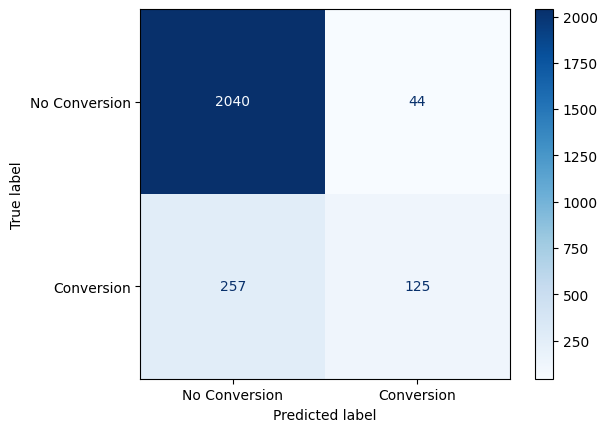

In [72]:
# creating an instance of logistic regr.
model_lr = LogisticRegression()

# training
print("<<< Training starts...")
model_lr.fit(X_train, y_train)
print("Model training complete.")

# prediction
y_pred_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1] # Probs for 'Yes' class

# model evaluations
print("\n<<< Model Performance Evaluation >>>")
# accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
# Classification Report shows Precision, Recall, and F1-Score for both classes.
print("\n<<< Classification Report: >>>")
print(classification_report(y_test, y_pred_lr, target_names=['No Conversion (0)', 'Conversion (1)']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion matrix
print("\n<<< Generating Confusion Matrix...")
cm_logistic = confusion_matrix(y_test, y_pred_lr)
display_cm_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['No Conversion', 'Conversion'])

display_cm_logistic.plot(cmap='Blues', values_format='d')

### **Observations:**
1. When the model predicts 'Conversion', it is correct 74% of the time.
2. The model only incorrectly flagged 44 people as 'Conversion', which is a good sign though!
3. The model misses 257 out of 382 total conversions, which is POOR.
---
4. The model's ability to distinguish between the 2 classes is very good, as the ROC-AUC score is 0.8634.
5. A Decent Model if not very bad!
It can find potential conversions if it's okay to miss madjority of them!

### Hyperparameter tuning the logistic model



Best parameters found: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.8645579886455799
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2084
           1       0.55      0.69      0.61       382

    accuracy                           0.86      2466
   macro avg       0.75      0.79      0.77      2466
weighted avg       0.88      0.86      0.87      2466

ROC-AUC Score: 0.8634

Generating Confusion Matrix...


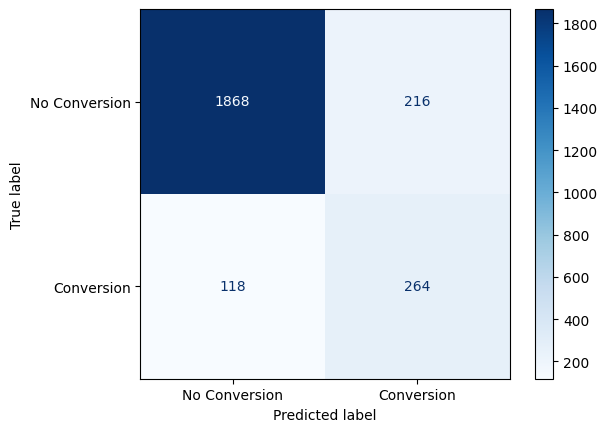

In [73]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # "complexity" values
    'penalty': ['l1', 'l2'],        # different regularization types
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}]
}

grid_search_lr = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

print(f"Best parameters found: {grid_search_lr.best_params_}")
best_model = grid_search_lr.best_estimator_

# Evaluate this new best model on your TEST data
predictions = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))


# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"ROC-AUC Score: {roc_auc:.4f}")


# Confusion matrix
print("\nGenerating Confusion Matrix...")
cm_logistic_cv = confusion_matrix(y_test, predictions)
display_cm_logistic_cv = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_cv, display_labels=['No Conversion', 'Conversion'])

display_cm_logistic_cv.plot(cmap='Blues', values_format='d')

**Observations:**
1. In the best params chosen by gridSearchCV is the `class_weight='balanced'` paramter, which forces the model to treat the "Conversion" class (which is in minority) just as important as the majority class "No Conversion"
2. The new recall value of 0.69 says that the new model finds 69% of the actual conversions, which is big improvement
3. However the accuracy was more earlier but that was because our data was having more of the "No Conversion" class. But in a real world usecase, the first model would fail.
4. The hyperparametric tuned model is a stable one, but comes with a tradeoff as the **precision** dropped from 0.74 to 0.55 as it now flags **216 No Conversion** as **Conversion**
5. The **F1-score** that is a balance between precision and recall improved significantly.

### 2. Random Forest Classifier

Accuracy: 0.8953771289537713

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2084
           1       0.76      0.48      0.59       382

    accuracy                           0.90      2466
   macro avg       0.83      0.73      0.76      2466
weighted avg       0.89      0.90      0.89      2466


First 10 predictions:
 [[0.93 0.07]
 [0.86 0.14]
 [0.32 0.68]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.91 0.09]
 [0.81 0.19]
 [0.75 0.25]
 [0.89 0.11]]

<<< Generating Confusion Matrix...


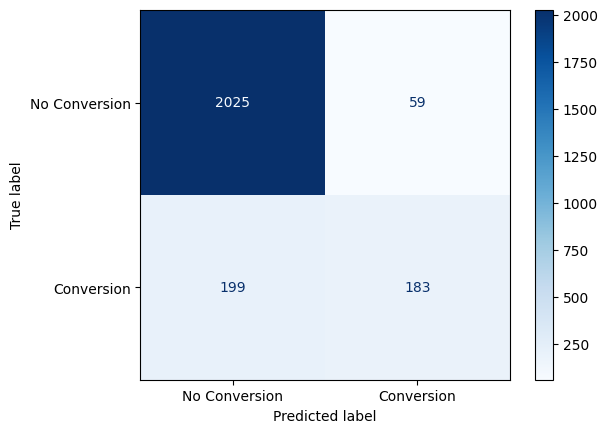

In [75]:
from sklearn.ensemble import RandomForestClassifier


# creating an instance and training the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)       # param like max_depth to tackle overfitting
model_rf.fit(X_train, y_train)

# predictions
y_pred_rf = model_rf.predict(X_test)

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# probability predictions for first 10 samples. proves biasness
y_pred_proba_rf = model_rf.predict_proba(X_test)
print("\nFirst 10 predictions:\n", y_pred_proba_rf[:10])


# Confusion matrix
print("\n<<< Generating Confusion Matrix...")
cm_logistic = confusion_matrix(y_test, y_pred_rf)
display_cm_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['No Conversion', 'Conversion'])

display_cm_logistic.plot(cmap='Blues', values_format='d')

**Observations:**
* This model has the best **accuracy** of **89.54%** till now, and even has the highest **precision** of **0.76**
* It's more confident when it classifies a session to **Conversion**
* A downside is that the model still misses 52% of actaul conversions.

---
### Hyperparameter tuning the Random Forest model

In [76]:
# defining the parameter grid to be used
param_grid2 = {
        'n_estimators': [100, 200],
        'criterion': ['gini'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False],
        'class_weight': [None, 'balanced']
    }

In [77]:
# instance and model training
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid2, scoring='f1',
                           cv=5, n_jobs=-1, verbose=1)

print("Started GridSearchCV....")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV completed with the following parameters:")
print(grid_search_rf.best_params_)
print(f'The best F1 score in CV was {grid_search_rf.best_score_: .4f}')

best_model_rf = grid_search_rf.best_estimator_
print(f'The best Random Forest estimator turns out to be {best_model_rf}')

Started GridSearchCV....
Fitting 5 folds for each of 96 candidates, totalling 480 fits
GridSearchCV completed with the following parameters:
{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
The best F1 score in CV was  0.6731
The best Random Forest estimator turns out to be RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)


Accuracy: 0.8925

Classification Report:
                   precision    recall  f1-score   support

No Conversion (0)       0.93      0.94      0.94      2084
   Conversion (1)       0.66      0.63      0.64       382

         accuracy                           0.89      2466
        macro avg       0.80      0.78      0.79      2466
     weighted avg       0.89      0.89      0.89      2466

First 10 predictions (probabilities [No Conv, Conv]):
[[0.93837281 0.06162719]
 [0.79772279 0.20227721]
 [0.31455646 0.68544354]
 [0.99141969 0.00858031]
 [0.96651248 0.03348752]
 [0.97600898 0.02399102]
 [0.89290441 0.10709559]
 [0.66140899 0.33859101]
 [0.74691874 0.25308126]
 [0.84225828 0.15774172]]
Generating Confusion Matrix...


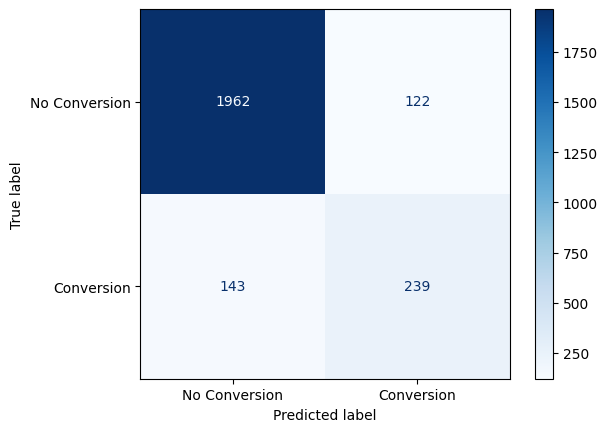

In [79]:
# predictions
prediction_rf_cv = best_model_rf.predict(X_test)

y_pred_proba_rf = best_model_rf.predict_proba(X_test)

# evaluation
accuracy = accuracy_score(y_test, prediction_rf_cv)
print(f'Accuracy: {accuracy:.4f}')
print()
print('Classification Report:')
print(classification_report(y_test, prediction_rf_cv, target_names=['No Conversion (0)', 'Conversion (1)']))

# probability predictions
print("First 10 predictions (probabilities [No Conv, Conv]):")
print(y_pred_proba_rf[:10])



# Confusion Matrix
print("Generating Confusion Matrix...")
ConfusionMatrixDisplay.from_estimator(best_model_rf, X_test, y_test,
                                      display_labels=['No Conversion', 'Conversion'],
                                      cmap='Blues')
plt.show()

**Observations:**
1. Hyperparam tuning improved the recall from 0.48 (i.e. missing more than half the conversions) to 0.63 (now finds 63% of the all conversions)
2. The improvement was made mostly due to `class_weight='balanced'` parameter chosen.


Choice for a model:

**Model 2 (Tuned LogReg)** if only goal is to find the maximum number of potential conversions

**Model 4 (Tuned RF)** if we want a strong, balanced model. It finds **almost** as many conversions as Model 2 (Recall: 0.63 vs 0.68) but is **significantly more** precise when it does (Precision: 0.64 vs 0.55). This makes it more efficient and the better all-around choice.

---

In [80]:
#

> The key problem we have encountered is the tradeoff between precision and recall for the conversion class. This algorithm has the parameter `scale_pos_weight`. Instead of simply using `class_weight='balanced'` the new parameter specifies **how much important hte `Conversion` class is than the `No Conversion` class.**

### 3. XGBoost (Hyperparameter tuned)

In [81]:
import xgboost as xgb
from collections import Counter

counts = Counter(y_train)
scale_pos_weight = counts[0] / counts[1]
print(f"scale_pos_weight for our training data: {scale_pos_weight:.2f}")


scale_pos_weight for our training data: 5.46


In [82]:
# creating an instance
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# defining the parameter grid to search
param_grid = {
    'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.05],
    'scale_pos_weight': [scale_pos_weight, 5.0, 6.0]        # tuning around our calculated ratio
}


print("Starting GridSearchCV for XGBoost.......")
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1, verbose=1)
# model training
grid_search_xgb.fit(X_train, y_train)

print("Done!")

Starting GridSearchCV for XGBoost.......
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Done!


In [83]:
# best parameters
print(f"Best parameters found: {grid_search_xgb.best_params_}")
print(f"Best F1-score during CV: {grid_search_xgb.best_score_:.4f}")

# best model for evaluation
best_xgb_model = grid_search_xgb.best_estimator_

# predictions
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_xgb_proba = best_xgb_model.predict_proba(X_test)

Best parameters found: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': 5.0}
Best F1-score during CV: 0.6584


Accuracy: 0.8747

Classification Report:
                   precision    recall  f1-score   support

No Conversion (0)       0.95      0.90      0.92      2084
   Conversion (1)       0.57      0.76      0.65       382

         accuracy                           0.87      2466
        macro avg       0.76      0.83      0.79      2466
     weighted avg       0.89      0.87      0.88      2466


First 10 predictions (probabilities [No Conv, Conv]):
[[0.98839176 0.01160823]
 [0.64124084 0.35875916]
 [0.17712808 0.8228719 ]
 [0.9952222  0.00477781]
 [0.9941498  0.0058502 ]
 [0.9820008  0.01799914]
 [0.7010474  0.29895258]
 [0.8154232  0.1845768 ]
 [0.7059892  0.29401082]
 [0.7730275  0.2269725 ]]



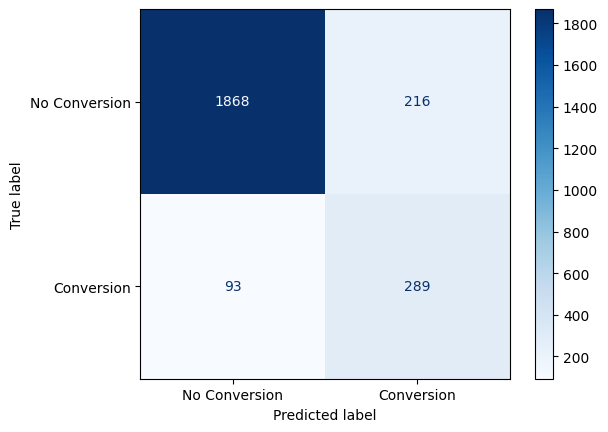

In [84]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

print()

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Conversion (0)', 'Conversion (1)']))

print()
# probability predictions
print("First 10 predictions (probabilities [No Conv, Conv]):")
print(y_pred_xgb_proba[:10])

print()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test, y_test,
                                      display_labels=['No Conversion', 'Conversion'],
                                      cmap='Blues')
plt.show()

## **Final Observations**

#### Our tuned XGBoost model is the best for our business goals.
1. **Highest Recall:** It finds 76% of actual conversions, and this is the highest of all the models we built. Therefore, it misses the fewest opportunities.

2. **Highest F1 score:** This model has the highest F1 score 0.65, which provides the best balance between the precision(being correct on finding conversions) and recall(finding conversions).

3. This model missed just 93 conversions, which is the least among all. It indentifies the most conversion opportunities.

4. **Highest Accuracy of 87.47%**